### Processing data

In [26]:
import re

import pandas as pd
import nltk

In [27]:
# read in comments
comments = pd.read_csv('./data/raw/Comments.csv')

In [28]:
sample = comments.Reply.iloc[9]
sample

'Wow that’s lucky! Are you absolutely sure you won it!?!?'

In [29]:
re.sub(r'\(?http\S+', '', sample)

'Wow that’s lucky! Are you absolutely sure you won it!?!?'

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
word_tokenized = nltk.word_tokenize(sample)
word_tokenized

['Wow',
 'that',
 '’',
 's',
 'lucky',
 '!',
 'Are',
 'you',
 'absolutely',
 'sure',
 'you',
 'won',
 'it',
 '!',
 '?',
 '!',
 '?']

In [32]:
' '.join(word_tokenized)

'Wow that ’ s lucky ! Are you absolutely sure you won it ! ? ! ?'

**Bigrams**

In [33]:
from nltk.collocations import *

In [34]:
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [35]:
all_text = nltk.word_tokenize(all_text)

In [36]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10))

[('Chrono', 'Trigger'), ('Mountain', 'Dew'), ('Resident', 'Evil'), ('Pocket', 'Camp'), ('Final', 'Fantasy'), ('Rogue', 'Squadron'), ('Harvest', 'Moon'), ('Radiant', 'Dawn'), ('Crystal', 'Chronicles'), ('twilight', 'princess')]


In [37]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [38]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

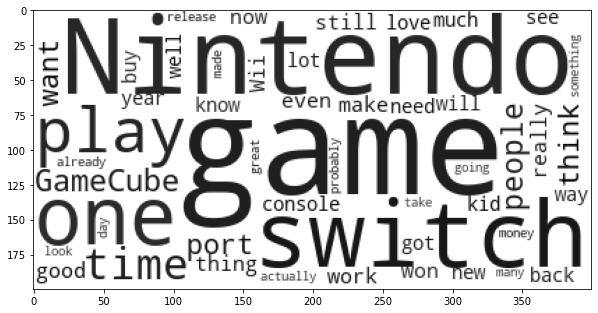

In [39]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants

sid = SentimentIntensityAnalyzer()

In [42]:
comments


,Reply,Upvote,Time,Key
0,Whoaaa! Your kid must be so excited,3072,2019-10-18 06:01:58,0
1,"Nice, grats! Back in 1999 I actually won a Nin...",9307,2019-10-18 06:04:13,0
2,Huh. People actually win from these things?,4663,2019-10-18 06:01:10,0
3,Dang! Congats! What games?,920,2019-10-18 06:11:15,0
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0
...,...,...,...,...
101821,I thought you meant more like this:\n\nhttps:/...,1,2019-07-20 13:54:00,39
101822,"Sure, but I'm not a speedrunner, and neither a...",1,2019-07-21 05:32:58,39
101823,Ok. I haven't played any of those games except...,2,2019-07-20 11:41:54,39
101824,It's really funny you mention Celeste. I trie...,1,2019-07-20 12:04:45,39


In [43]:
sample = comments.Reply.iloc[101821]
sample

'I thought you meant more like this:\n\nhttps://cdn.gamerant.com/wp-content/uploads/nintendo-switch-gamecube-skin-1.jpg.optimal.jpg'

In [44]:
re.sub(r'\(?http\S+', '', sample)

'I thought you meant more like this:\n\n'

In [45]:
comments.Reply = comments['Reply'].astype(str)


### Sentiment analysis with Vader

In [46]:
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
comments.Reply = comments.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

Removing links and tokenizing comments 

In [47]:
comments_vader[['neg','neu','pos','compound']] = comments.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [49]:
comments_vader.head()

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,Whoaaa ! Your kid must be so excited,3072,2019-10-18 06:01:58,0,0.000,0.638,0.362,0.5280
1,"Nice , grats ! Back in 1999 I actually won a N...",9307,2019-10-18 06:04:13,0,0.000,0.693,0.307,0.7955
2,Huh . People actually win from these things ?,4663,2019-10-18 06:01:10,0,0.000,0.612,0.388,0.5859
3,Dang ! Congats ! What games ?,920,2019-10-18 06:11:15,0,0.000,1.000,0.000,0.0000
4,I won an Amazon Fire from a string cheese pack...,378,2019-10-18 06:04:36,0,0.097,0.525,0.379,0.7896


### Sentiment analysis with Textblob

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [47]:
comments = pd.read_csv('./data/raw/Comments.csv')